<h1> Russia Houses Sales </h1>

<p>date : date of publication of the announcement </p>
<p>time : the time when the ad was published </p>
<p>geo_lat : Latitude </p>
<p>geo_lon : Longitude </p>
<p>region : Region of Russia. There are 85 subjects in the country in total </p>
<p>building_type - Facade type  : 0-Other . 1-Panel . 2-Monolithic . 3-Brick . 4-Blocky . 5-Wooden </p>
<p>object_type - Apartment type  : 1-Secondary real estate market . 2-New building </p>
<p>level : Apartment floor </p>
<p>levels : Number of storeys </p>
<p>rooms : the number of living rooms</p>
<p>area : the total area of ​​the apartment </p>
<p>kitchen_area : Kitchen area </p>
<p>price : Price  (in rubles) </p>

In [43]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
import seaborn as sns

In [44]:
data =  read_csv("russia houses i.csv")

In [45]:
data.sample(5)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
696923,2700000,12/22/2018,12:33:44,55.161362,61.287855,5282,3,4,10,2,46.80,8.00,11
785269,3250000,9/11/2018,10:13:59,57.627113,39.842238,2604,3,3,9,3,65.00,7.00,1
768574,2150000,9/9/2018,4:13:40,55.016909,83.006732,9654,1,4,10,2,57.00,7.00,1
196822,1500000,9/13/2018,3:44:39,55.012840,83.001886,9654,1,9,10,1,48.02,13.78,11
506075,3500000,1/14/2019,19:39:31,59.894204,30.447808,2661,2,5,23,1,31.90,9.90,11


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034750 entries, 0 to 1034749
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          1034750 non-null  int64  
 1   date           1034750 non-null  object 
 2   time           1034750 non-null  object 
 3   geo_lat        1034750 non-null  float64
 4   geo_lon        1034750 non-null  float64
 5   region         1034750 non-null  int64  
 6   building_type  1034750 non-null  int64  
 7   level          1034750 non-null  int64  
 8   levels         1034750 non-null  int64  
 9   rooms          1034750 non-null  int64  
 10  area           1034750 non-null  float64
 11  kitchen_area   1034750 non-null  float64
 12  object_type    1034750 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 102.6+ MB


<h2> Data Cleaning </h2>

In [47]:
data.duplicated().sum()

285

In [48]:
data.drop_duplicates(inplace= True)

In [49]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1034465.0,3.939348e+06,1.723555e+07,70000.000000,1.700000e+06,2.545000e+06,4.126000e+06,2.000000e+09
geo_lat,1034465.0,5.378468e+01,4.605379e+00,41.459089,5.338015e+01,5.503873e+01,5.591648e+01,7.198040e+01
geo_lon,1034465.0,5.532069e+01,2.101605e+01,19.903931,3.814696e+01,4.402524e+01,8.295041e+01,1.625361e+02
region,1034465.0,4.644734e+03,3.539501e+03,3.000000,2.661000e+03,3.019000e+03,9.654000e+03,6.188800e+04
building_type,1034465.0,1.900934e+00,1.044910e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,1034465.0,6.031362e+00,4.804755e+00,1.000000,2.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01
levels,1034465.0,1.101786e+01,6.280018e+00,1.000000,5.000000e+00,1.000000e+01,1.600000e+01,3.900000e+01
rooms,1034465.0,1.851676e+00,8.783413e-01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,1034465.0,5.417442e+01,2.680925e+01,1.000000,3.900000e+01,4.894000e+01,6.307000e+01,4.444000e+03
kitchen_area,1034465.0,1.046947e+01,5.500341e+00,0.030000,7.000000e+00,9.500000e+00,1.240000e+01,1.200000e+03


<h3>Dealing With Outliers</h3>

In [50]:
mean_ = data["price"].mean()
median_ = data["price"].median()
std_ = data["price"].std()

print(f"the mean of price value {mean_} \n and median {median_}\n and standard deviation {std_} ")


the mean of price value 3939347.7925304384 
 and median 2545000.0
 and standard deviation 17235552.757957157 


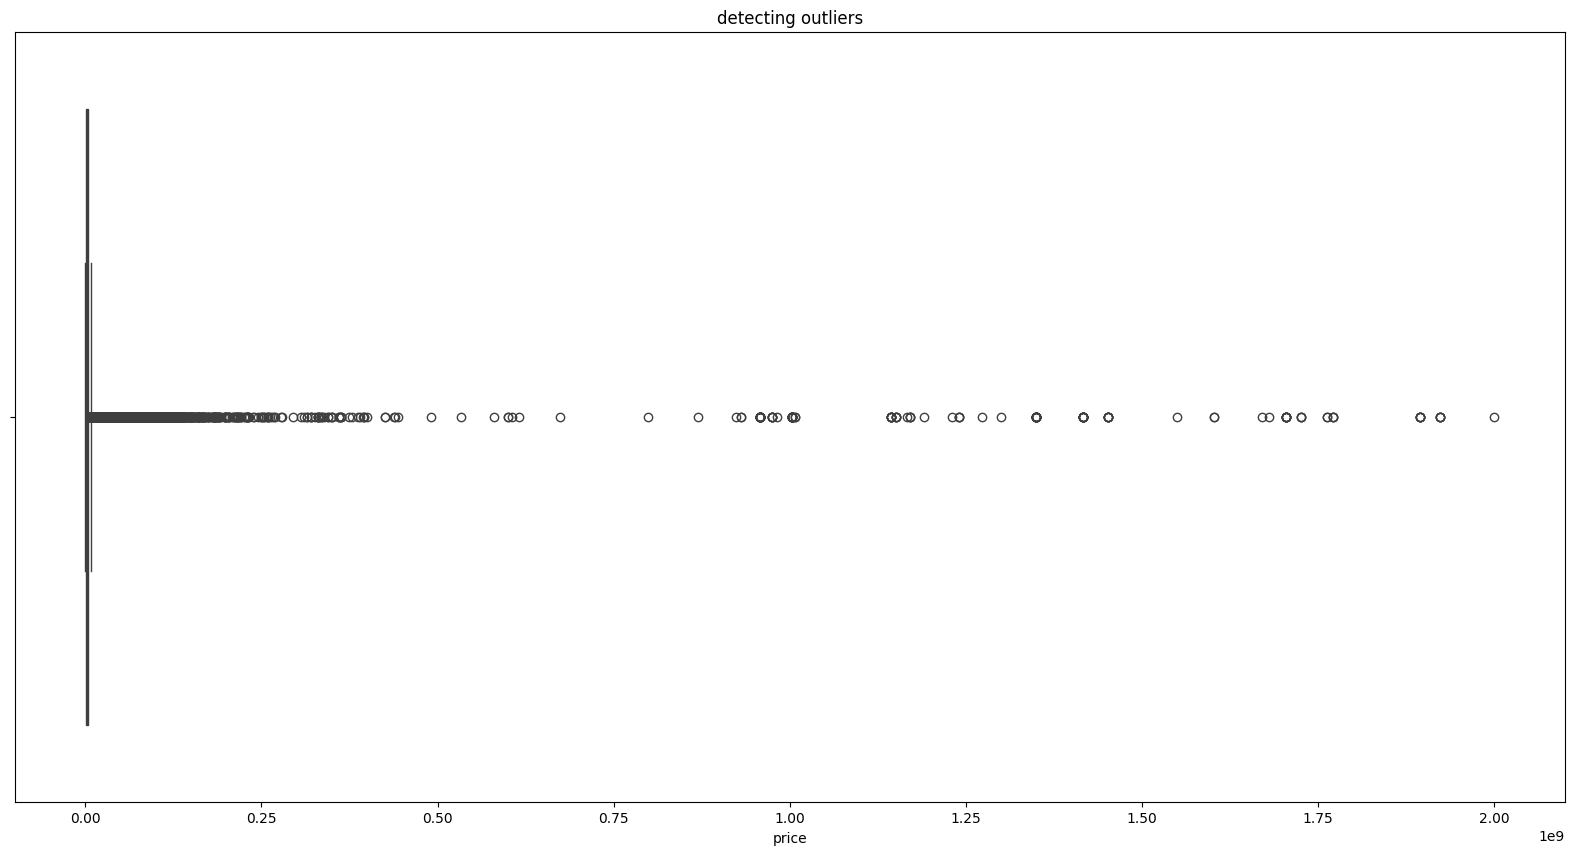

In [51]:
figure(figsize=(20,10))
sns.boxplot(x= data["price"])
title("detecting outliers")
show()

In [52]:
q1 = percentile(data["price"], 25)
q3 = percentile(data["price"], 75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

In [53]:
data.shape

(1034465, 13)

In [54]:
data = data[(data["price"] >= lower_bound) & (data["price"] <= upper_bound)]
data.shape

(953375, 13)

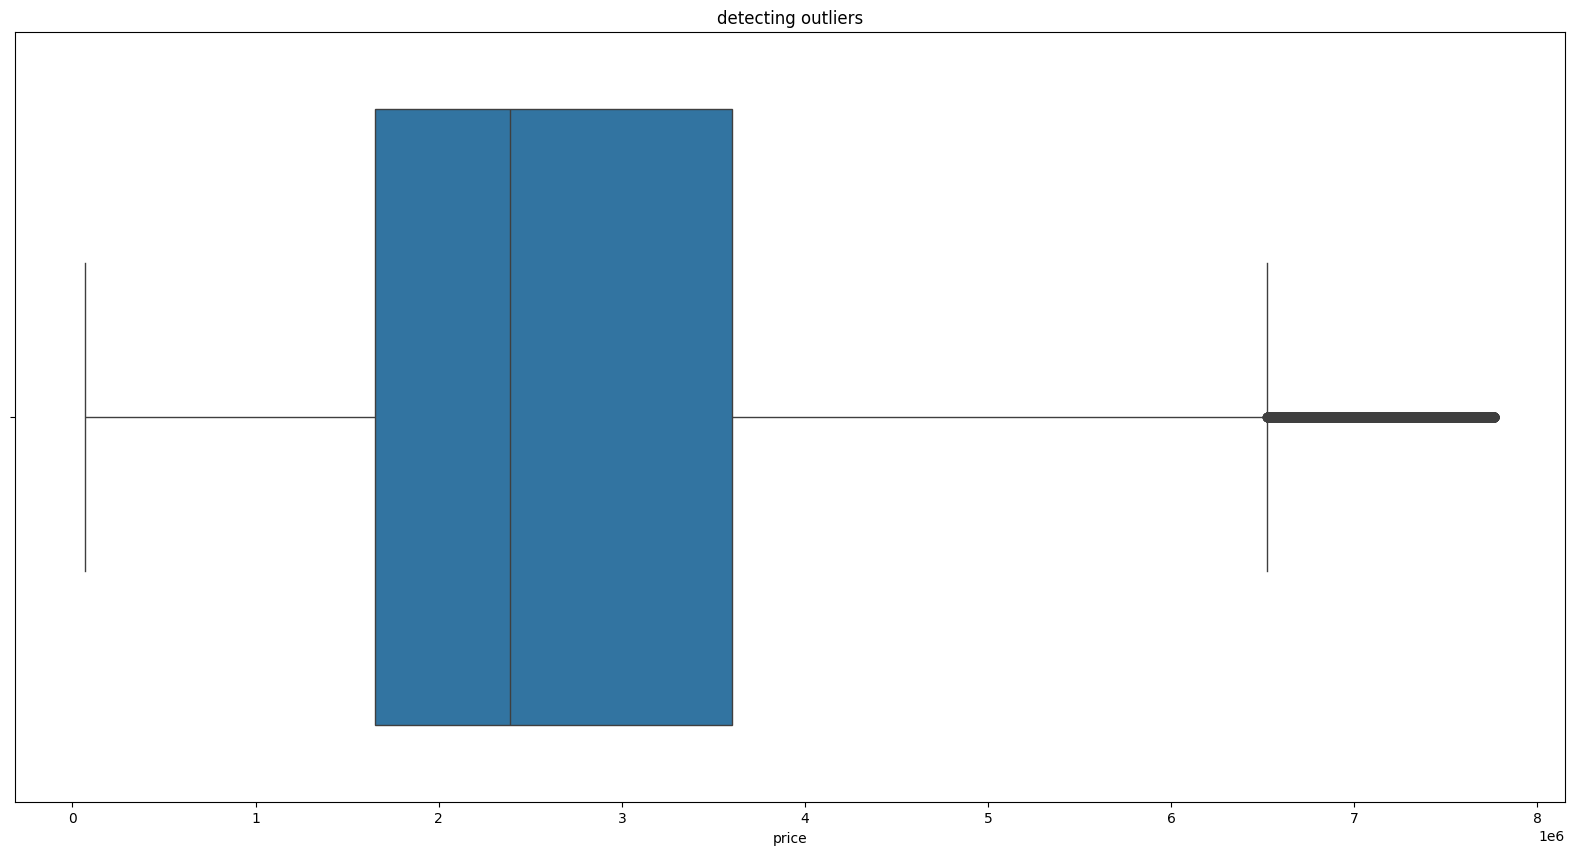

In [55]:
figure(figsize=(20,10))
sns.boxplot(x= data["price"])
title("detecting outliers")
show()

In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,953375.0,2.814657e+06,1.562705e+06,70000.000000,1.650000e+06,2.390000e+06,3.600000e+06,7.764900e+06
geo_lat,953375.0,5.362072e+01,4.634357e+00,41.459089,5.331366e+01,5.502943e+01,5.591221e+01,7.198040e+01
geo_lon,953375.0,5.663514e+01,2.107432e+01,19.903931,3.897438e+01,4.794522e+01,8.295886e+01,1.625361e+02
region,953375.0,4.902059e+03,3.495765e+03,3.000000,2.843000e+03,3.230000e+03,9.654000e+03,6.188800e+04
building_type,953375.0,1.893439e+00,1.054864e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,953375.0,5.833691e+00,4.620499e+00,1.000000,2.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01
levels,953375.0,1.067578e+01,6.061058e+00,1.000000,5.000000e+00,1.000000e+01,1.500000e+01,3.900000e+01
rooms,953375.0,1.782271e+00,8.337261e-01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,953375.0,5.115350e+01,2.242967e+01,1.000000,3.800000e+01,4.700000e+01,6.000000e+01,4.444000e+03
kitchen_area,953375.0,9.978866e+00,4.818026e+00,0.030000,7.000000e+00,9.000000e+00,1.200000e+01,1.200000e+03


In [57]:
mean__ = data["price"].mean()
median__ = data["price"].median()
std__ = data["price"].std()

print(f"the mean of price value {mean__} \n and median {median__}\n and standard deviation {std__} ")

the mean of price value 2814657.0369812506 
 and median 2390000.0
 and standard deviation 1562705.0703054413 


<h2> Time Series Visual.</h2>

In [58]:
data["date"] = to_datetime(data["date"],format= "%m/%d/%Y")

In [59]:
from datetime import *
data["month"] = data["date"].dt.strftime("%m/%Y")

In [60]:
datetimeseries = DataFrame(data["price"].groupby(data["month"]).sum())
datetimeseries.reset_index(inplace= True)
datetimeseries.sort_values(by="price",ascending= True,inplace= True)
datetimeseries

,month,price
1,02/2018,10050000
4,05/2018,43748912
3,04/2018,79630000
5,06/2018,83560000
2,03/2018,93855620
6,07/2018,113741000
7,08/2018,231639790
0,01/2019,447983546937
8,09/2018,456024406956
9,10/2018,537551983722


C:\Users\W.I\AppData\Local\Temp\ipykernel_268\1260879663.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")
C:\Users\W.I\AppData\Local\Temp\ipykernel_268\1260879663.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")


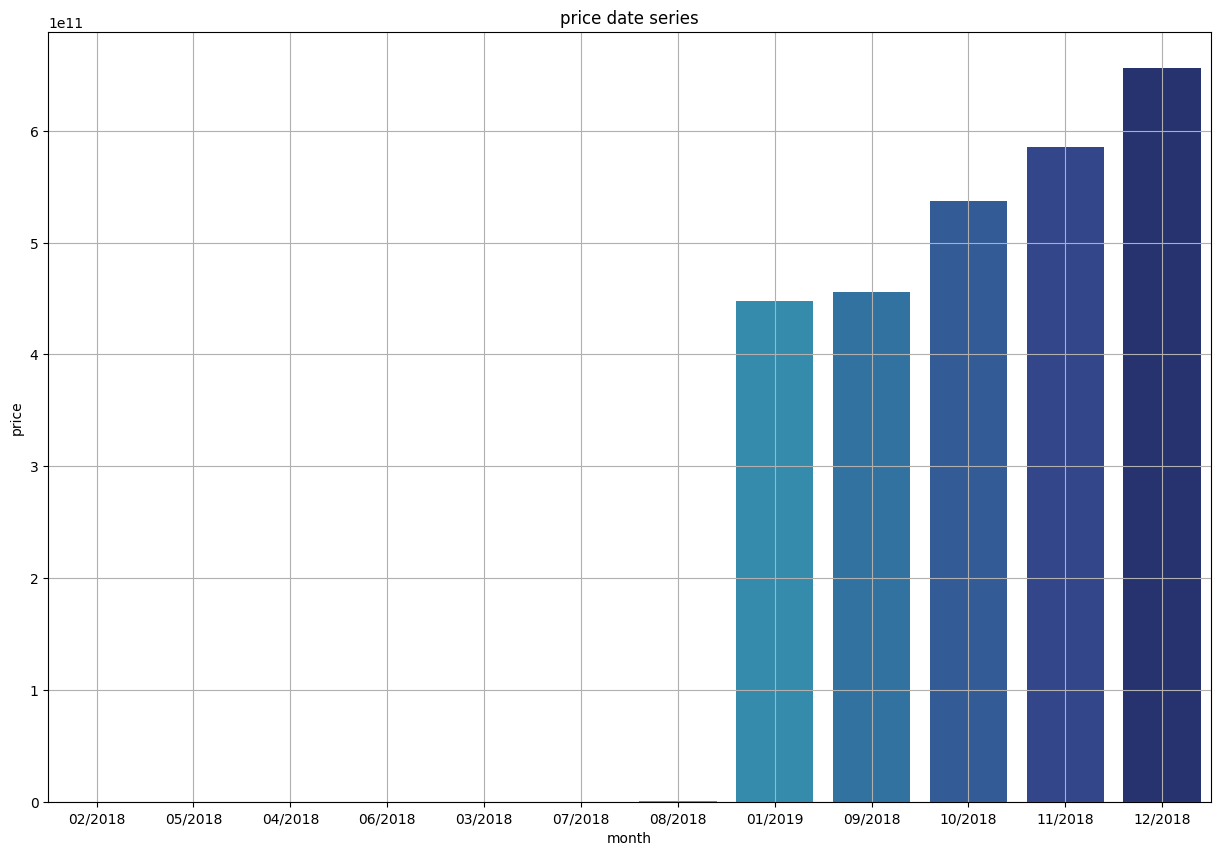

In [61]:
figure(figsize=(15,10))
sns.barplot(x= datetimeseries["month"], y= datetimeseries["price"].sort_values(ascending=True),ci=None,palette= "YlGnBu")
title("price date series")
grid(True)
show()


<h2>Data Visualization</h2>

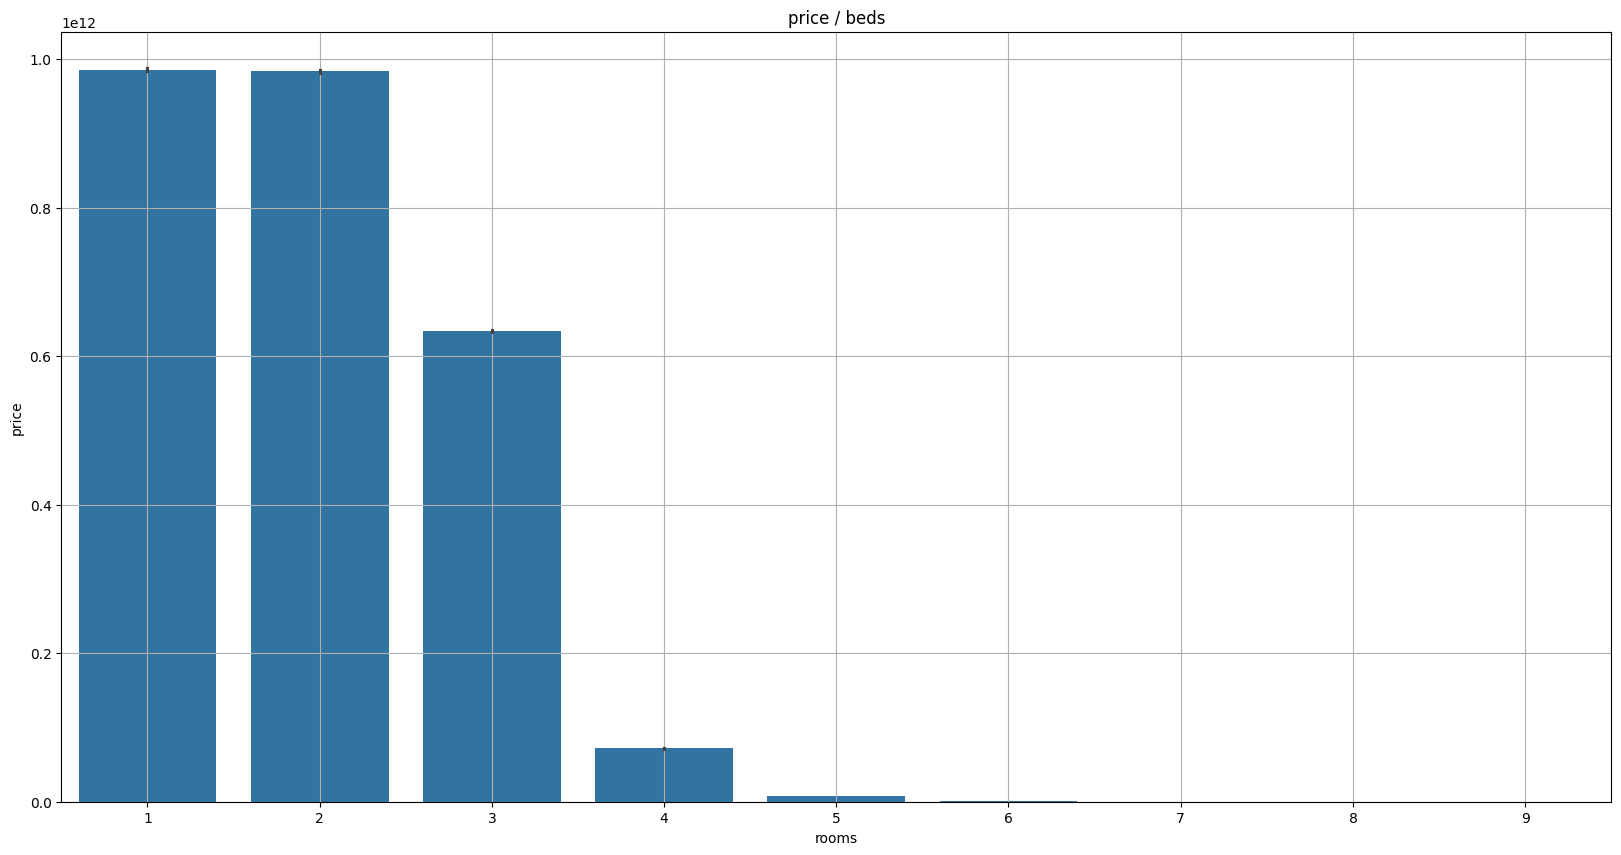

In [62]:
figure(figsize=(20,10))
sns.barplot(x= data["rooms"], y= data["price"] ,estimator= sum)
title("price / beds")
grid(True)
show()

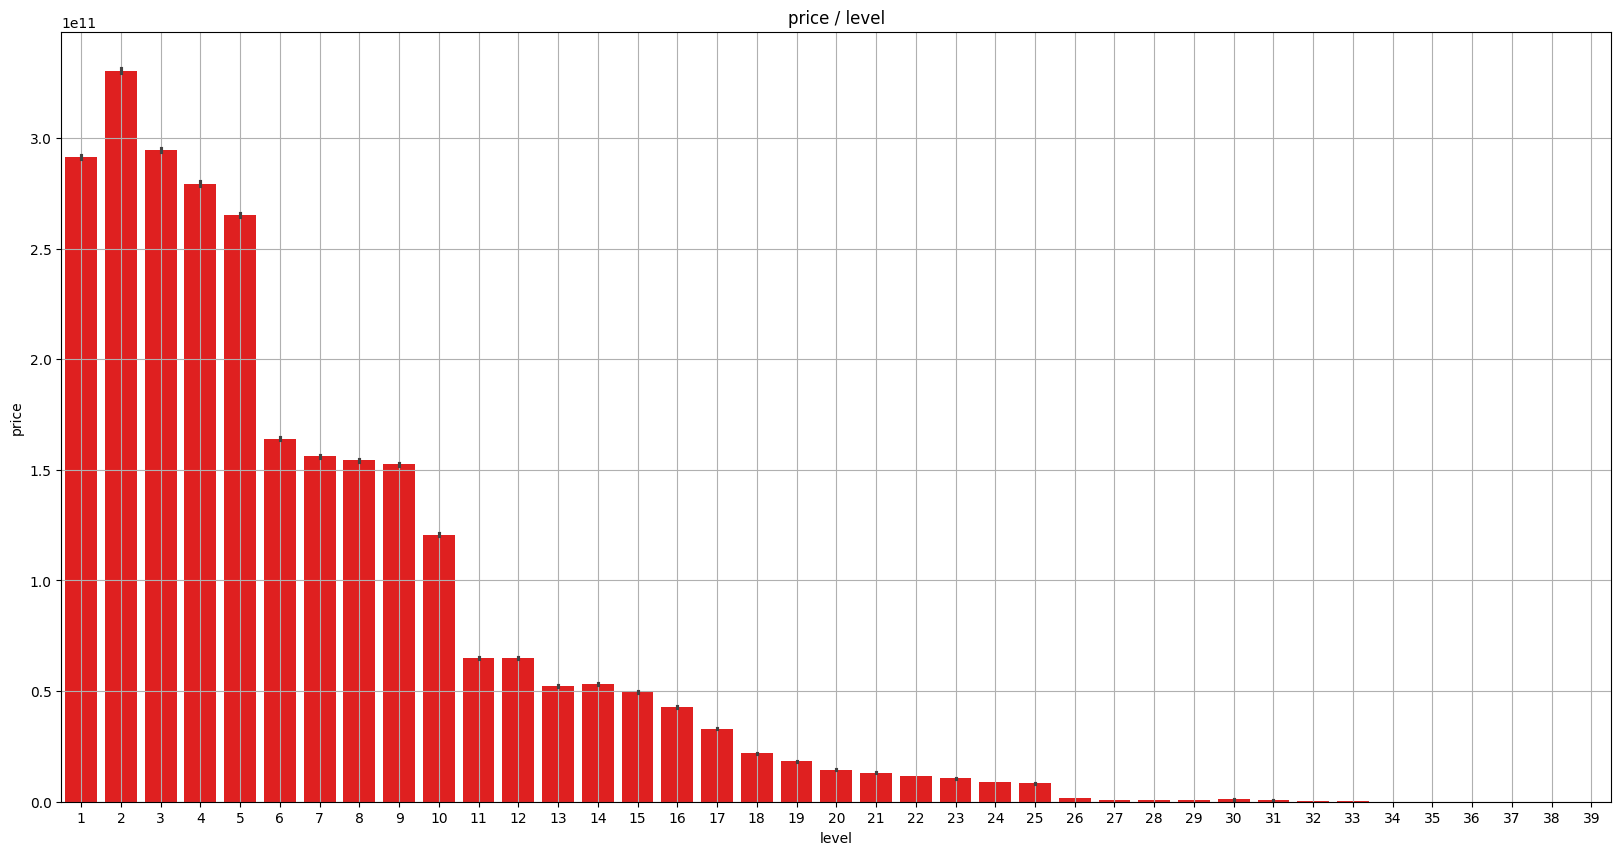

In [63]:
figure(figsize=(20,10))
sns.barplot(x= data["level"], y= data["price"] ,color= "red",estimator= sum)
title("price / level")
grid(True)
show()

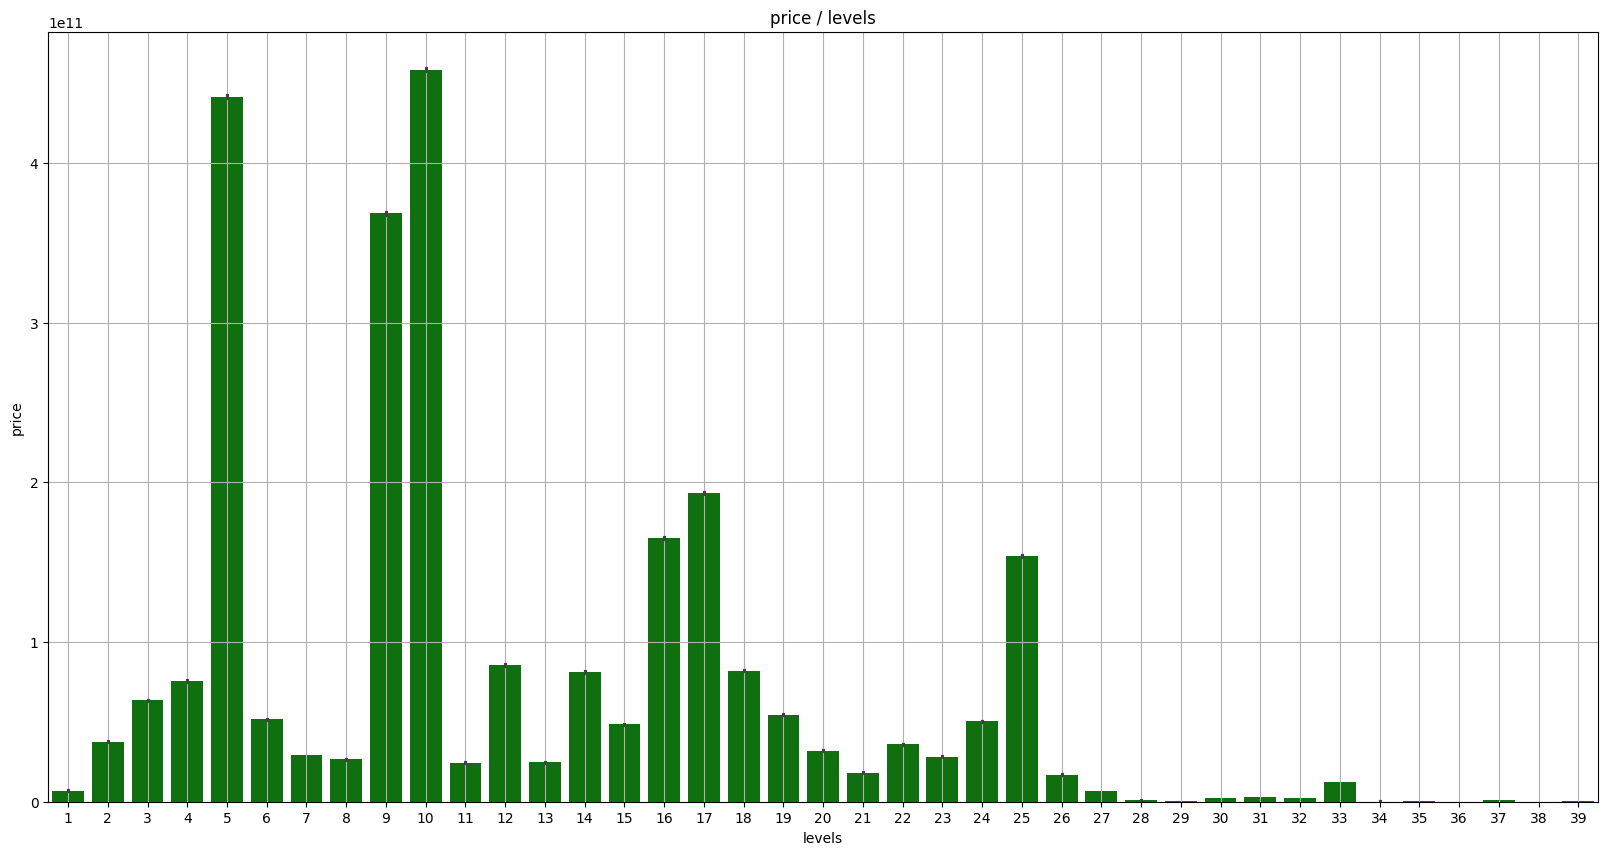

In [64]:
figure(figsize=(20,10))
sns.barplot(x= data["levels"], y= data["price"] , color="green",estimator= sum)
title("price / levels")
grid(True)
show()

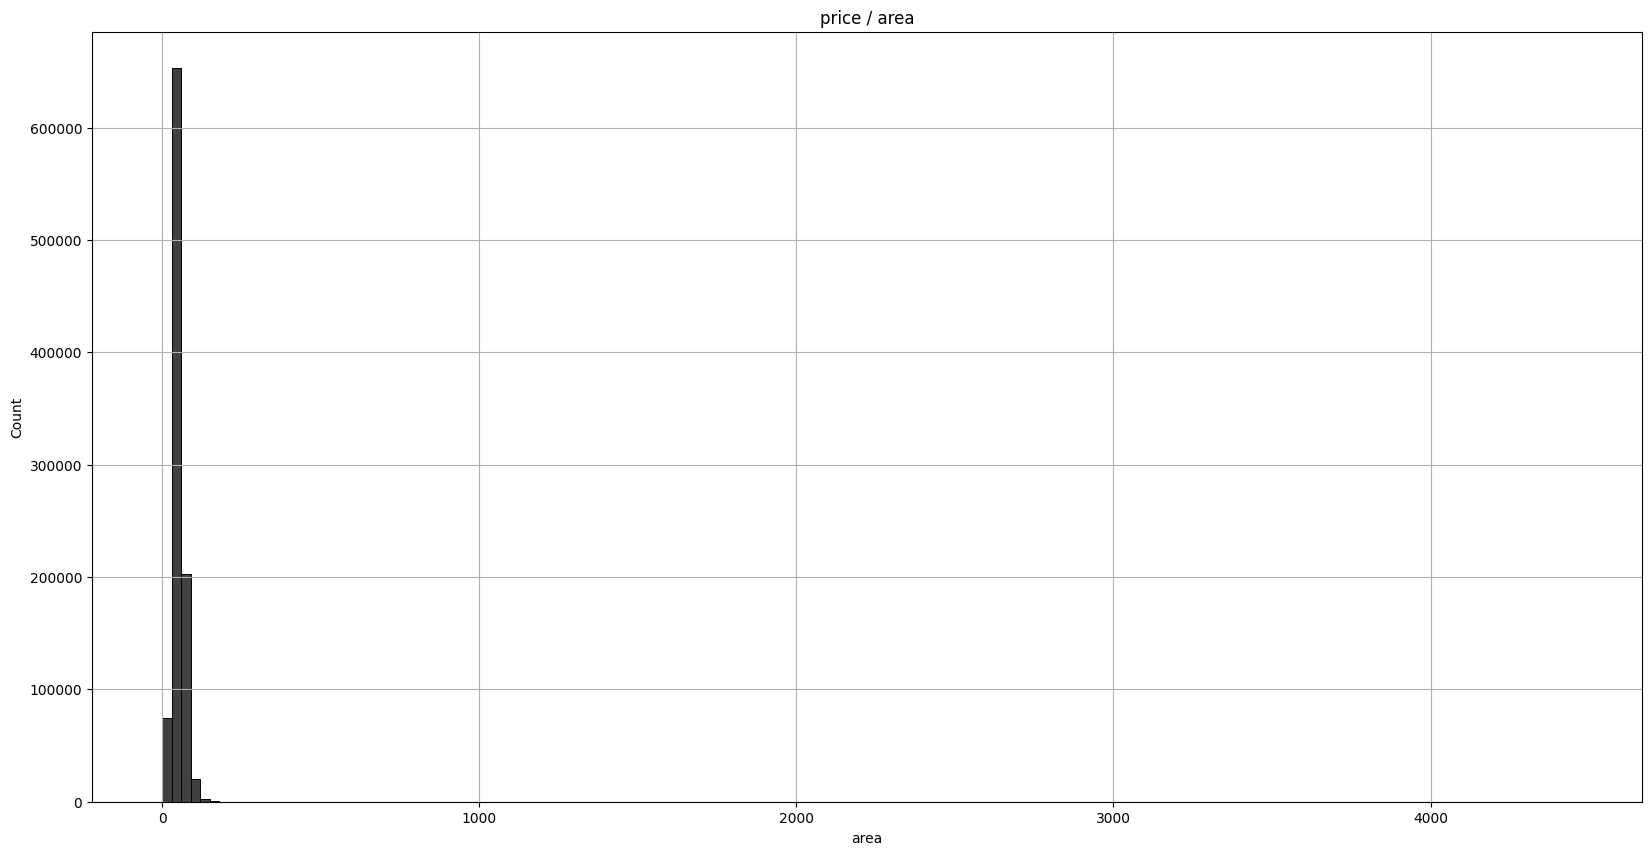

In [65]:
figure(figsize=(20,10))
sns.histplot(x= data["area"],binwidth= 30,color="black")
title("price / area")
grid(True)
show()

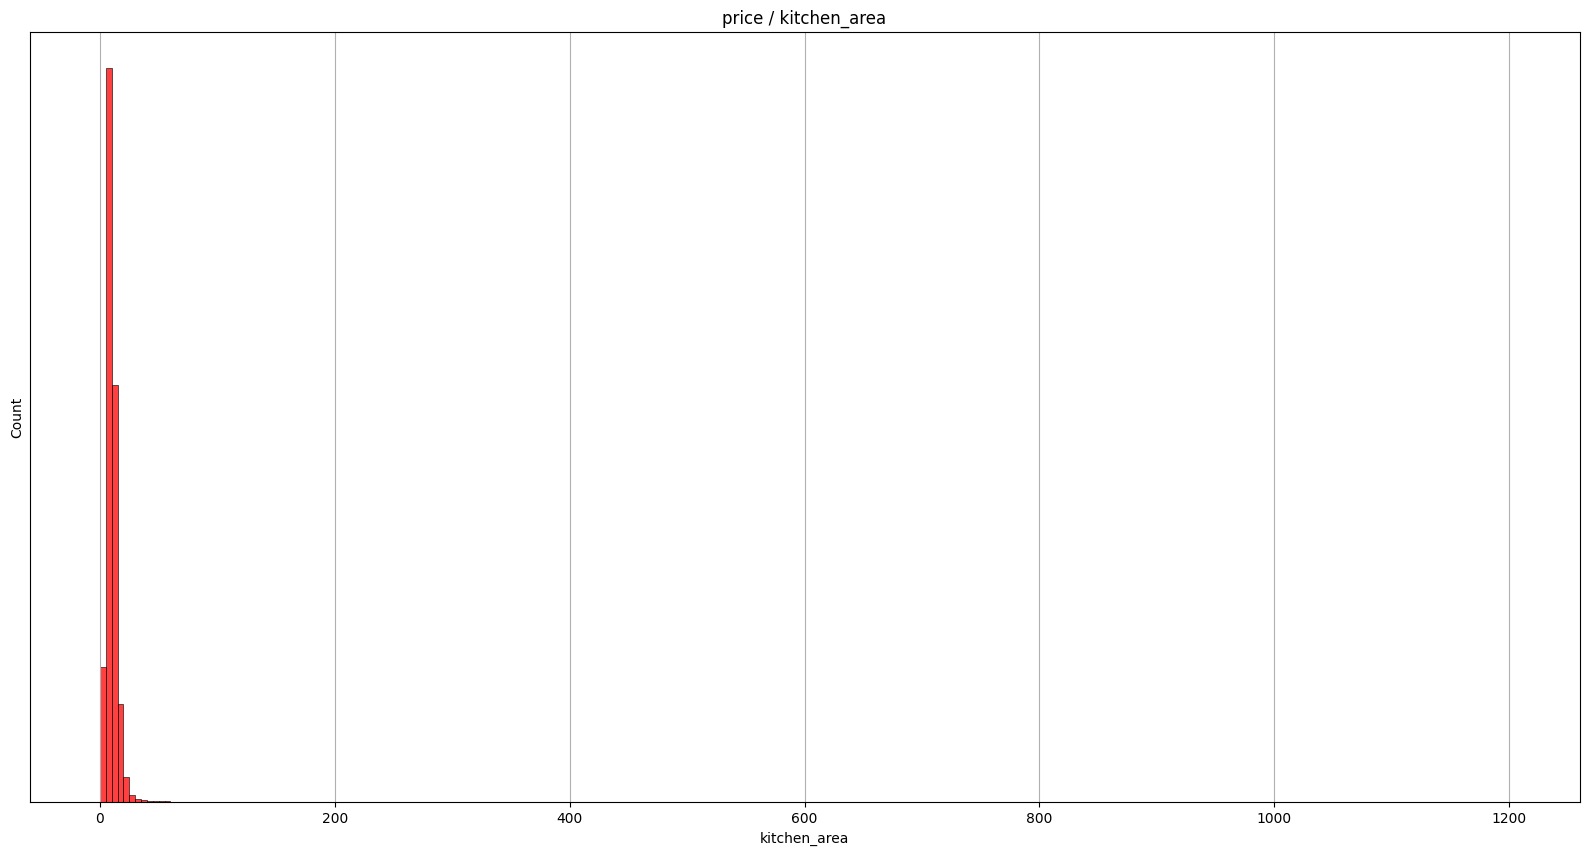

In [66]:
figure(figsize=(20,10))
sns.histplot(x= data["kitchen_area"],color= "red",binwidth= 5)
title("price / kitchen_area")
grid(True)
gca().set_yticks([])
show()

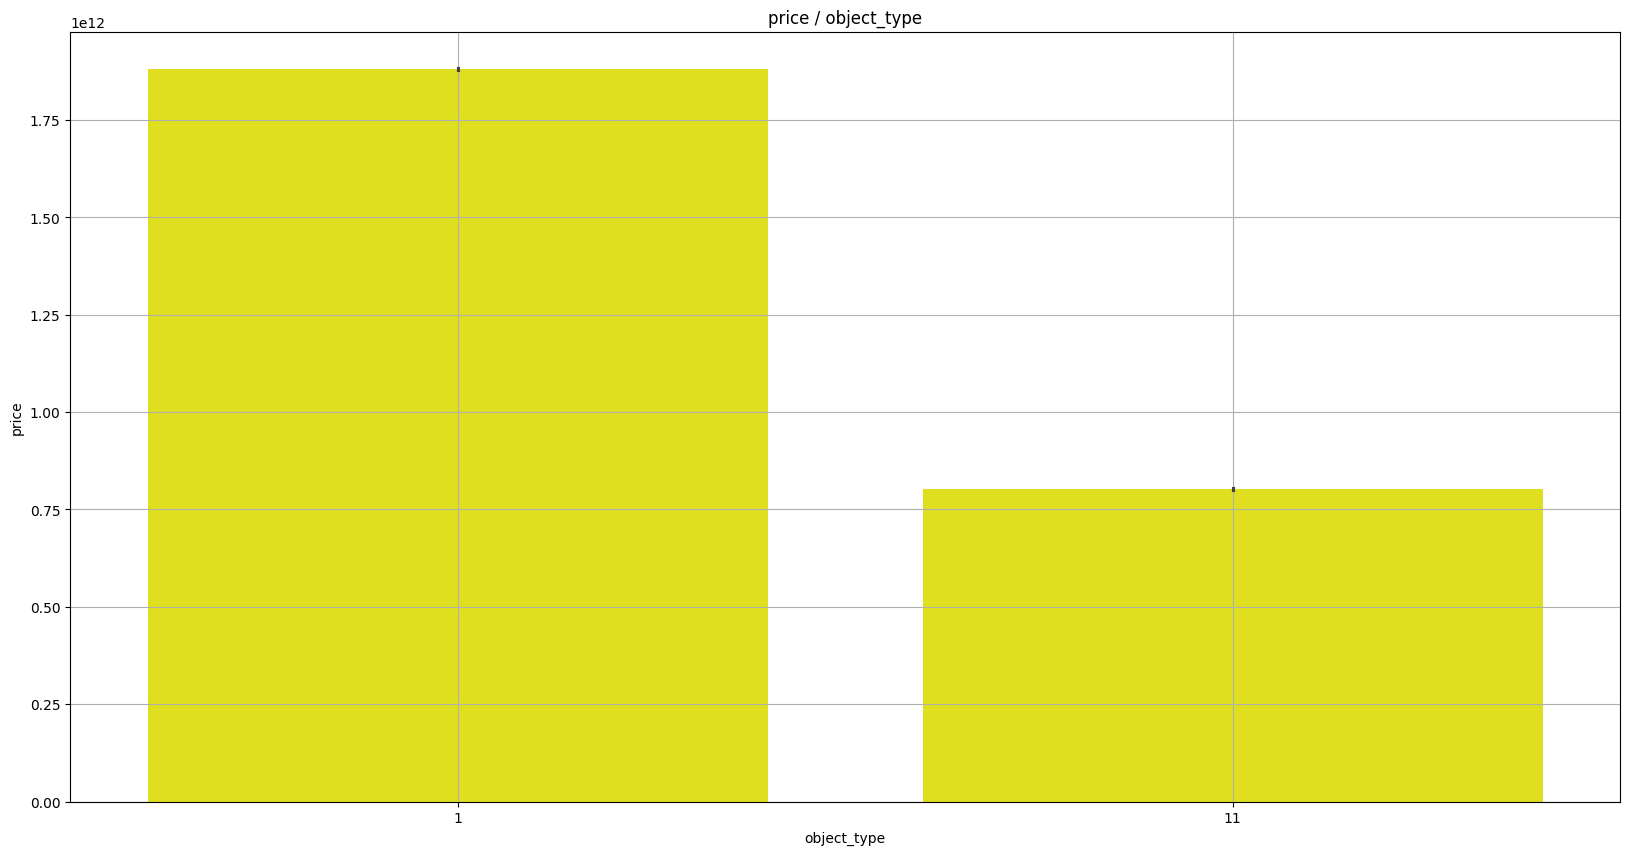

In [67]:
figure(figsize=(20,10))
sns.barplot(x= data["object_type"].sort_values(ascending= False), y= data["price"],color= 'yellow',estimator= sum)
title("price / object_type")
grid(True)
show()

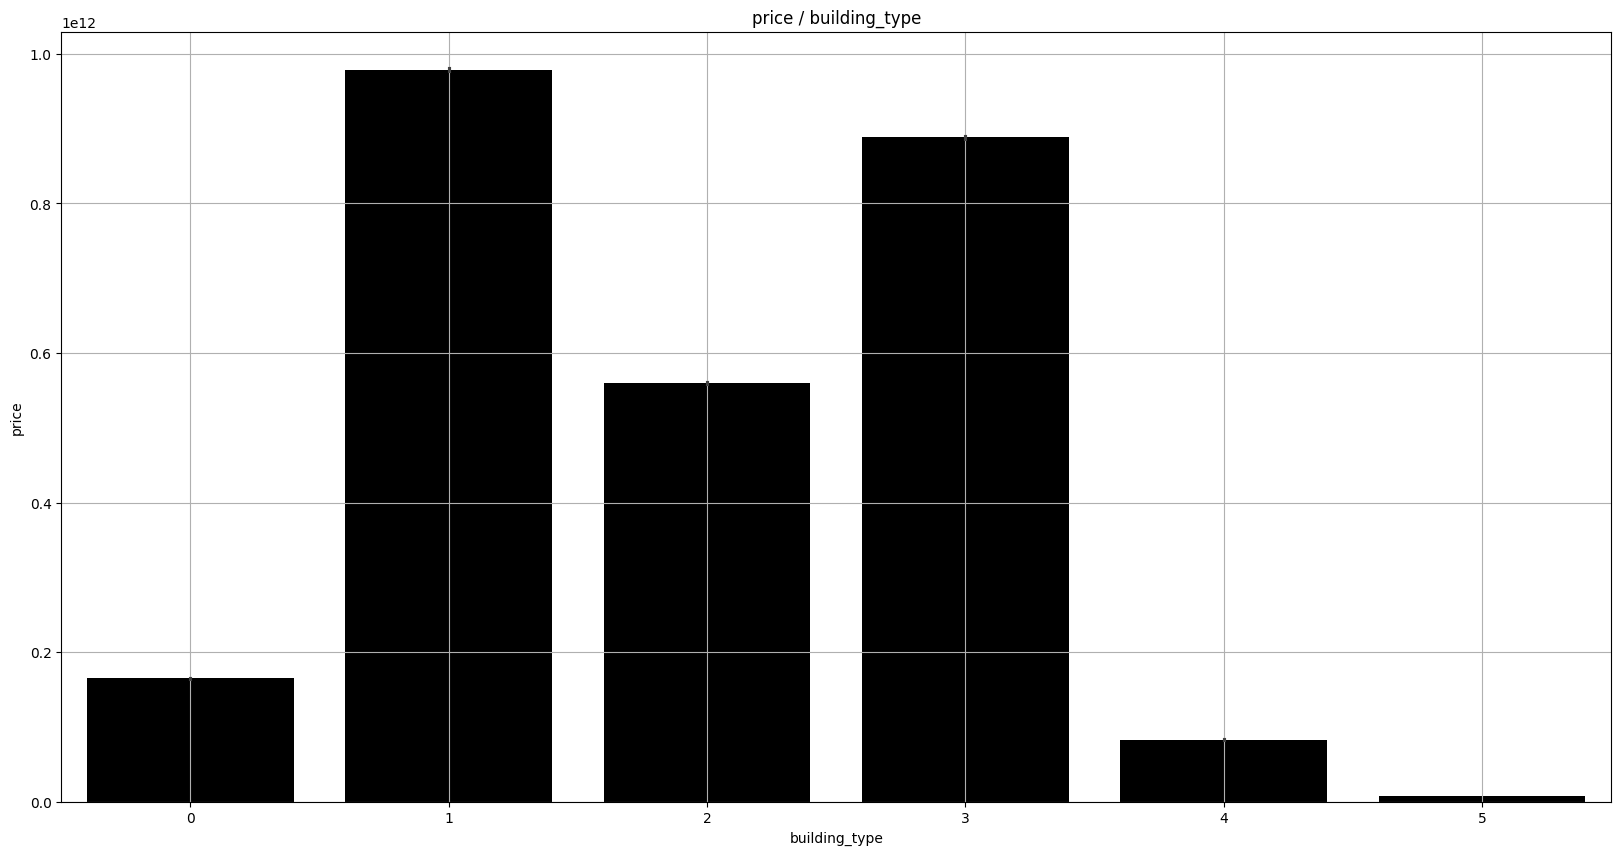

In [68]:
figure(figsize=(20,10))
sns.barplot(x= data["building_type"].sort_values(ascending= False), y= data["price"],color="black",estimator= sum)
title("price / building_type")
grid(True)
show()

<h4> sales location density  </h4>

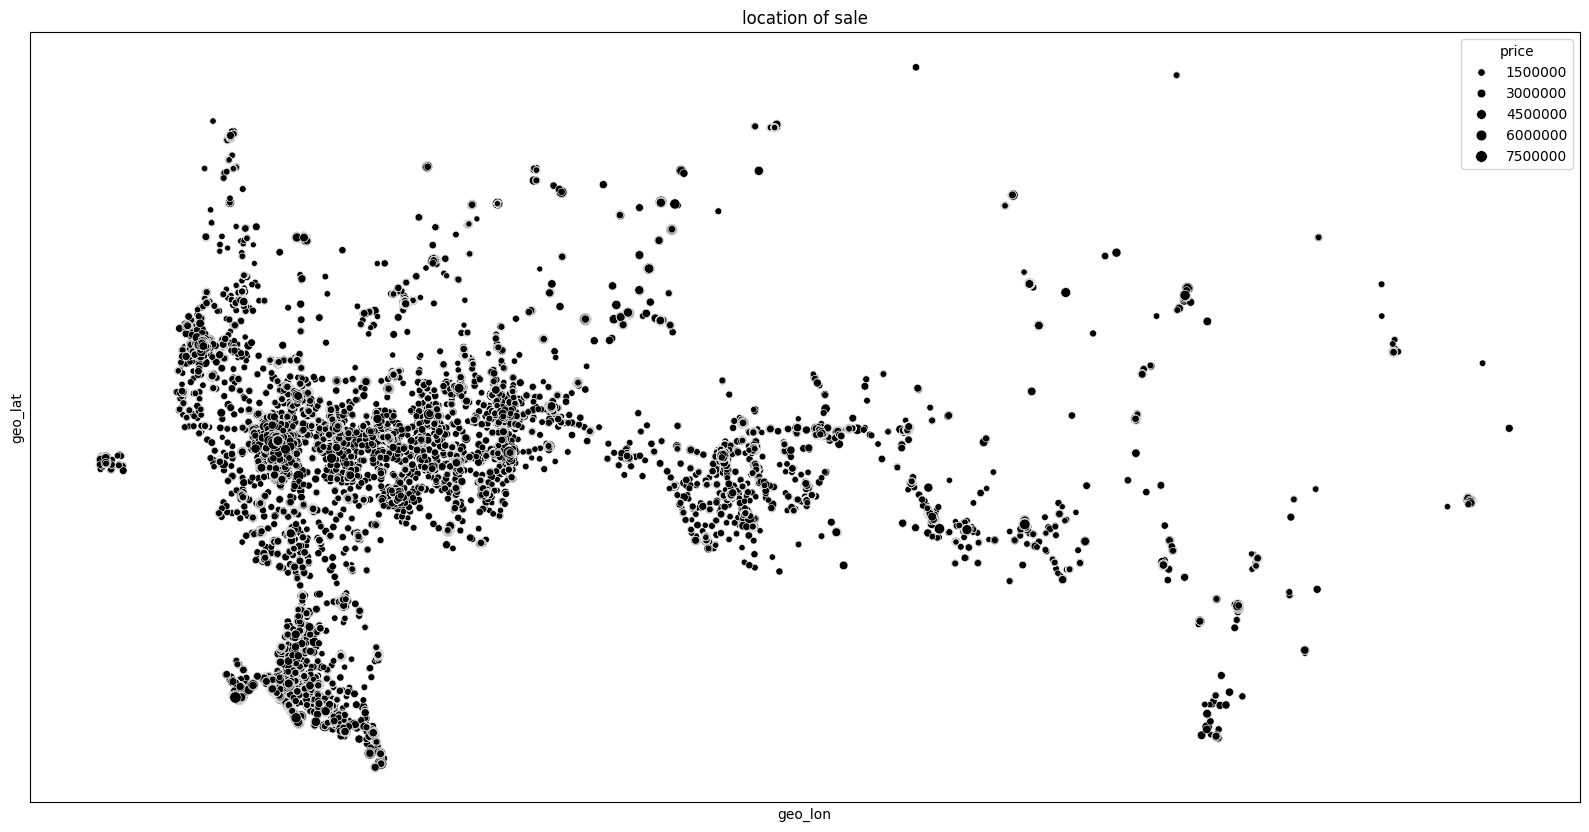

In [69]:
figure(figsize=(20,10))
sns.scatterplot(x= data["geo_lon"], y= data["geo_lat"],size= data["price"],color="black")
title("location of sale")
grid(True)
gca().set_xticks([])
gca().set_yticks([])
show()

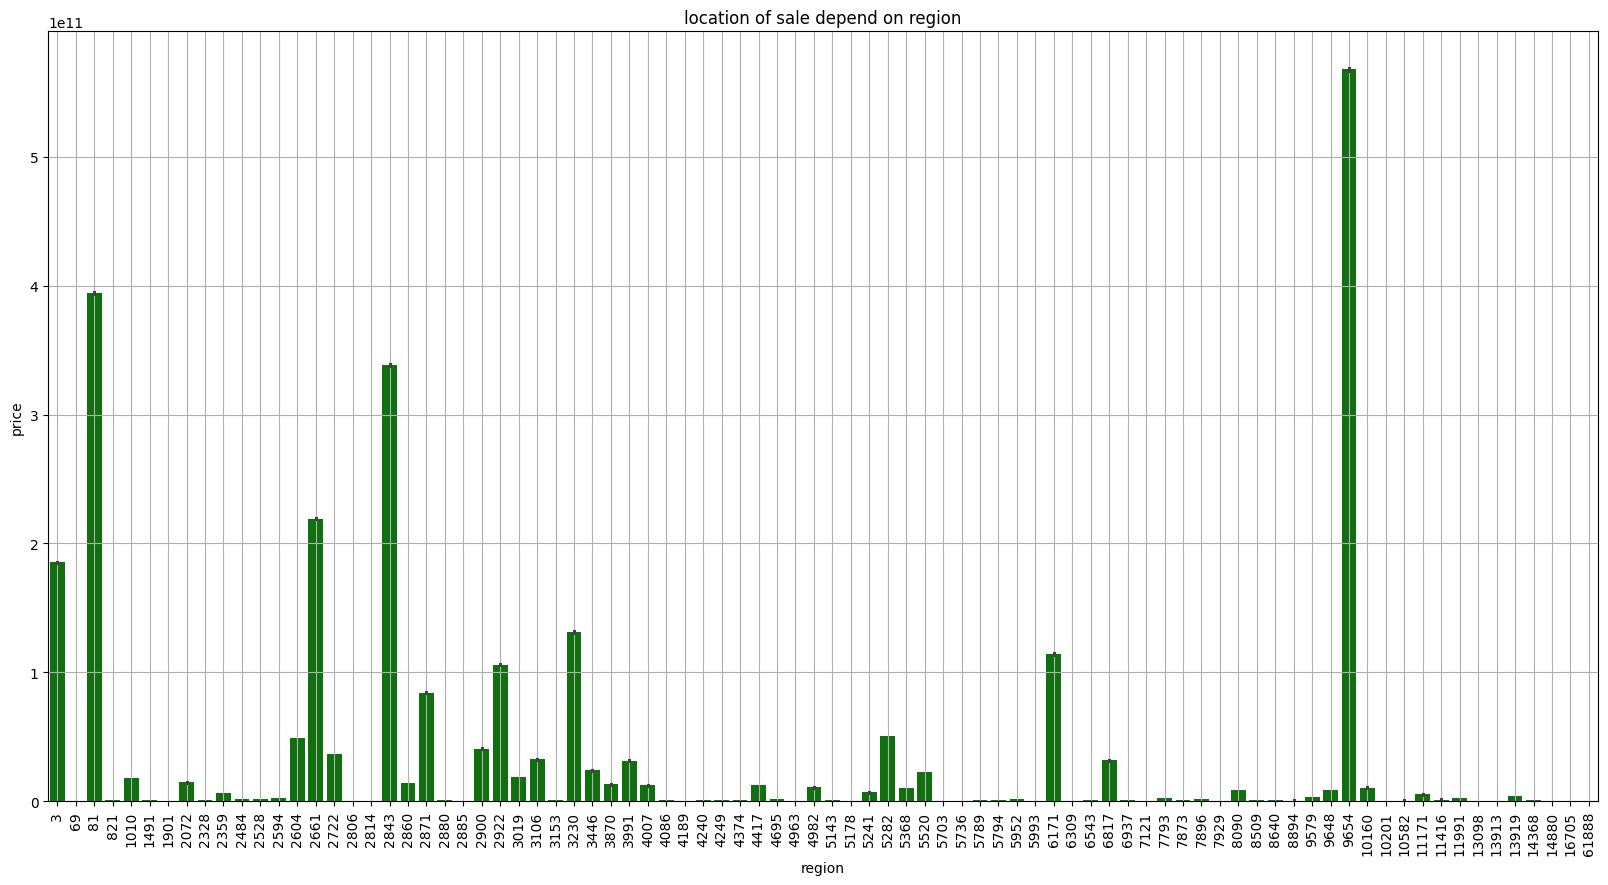

In [70]:
figure(figsize=(20,10))
sns.barplot(x= data["region"], y= data["price"],estimator= sum,color= "green")
title("location of sale depend on region")
grid(True)
xticks(rotation=90)
show()

<h3> Data Preprocessing  </h3>

In [71]:
data.drop(["date","time","month"] ,inplace= True , axis= 1 )


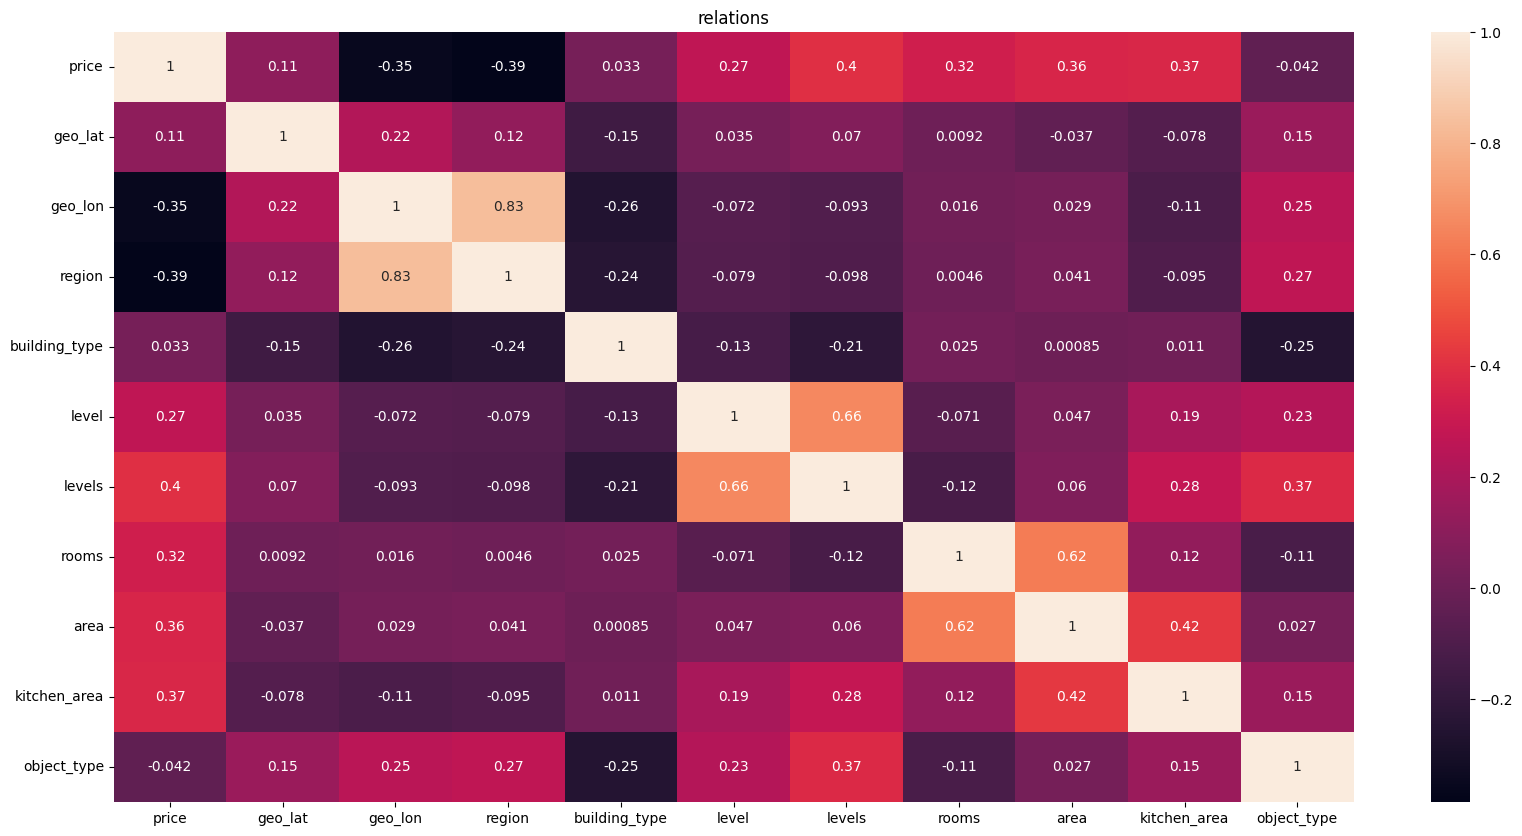

In [72]:
figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
title("relations")
show()

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["region"] = le.fit_transform(data["region"])
data["object_type"] = le.fit_transform(data["object_type"])

In [74]:
data.sample()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
666061,1450000,58.705176,59.483916,54,1,5,5,3,56.0,8.0,0


<h2> Data Spliting </h2>

In [75]:
from sklearn.model_selection import train_test_split

x = data.drop(["price"],axis= 1)
y = data["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2)

<h2>Data Modeling</h2>

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

In [77]:
lr = LinearRegression(fit_intercept= True)
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

lmedae = median_absolute_error(y_test,y_pred)
lmae = mean_absolute_error(y_test,y_pred)
lsme = mean_squared_error(y_test,y_pred)
lr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , lmedae)
print("mean absolute error is : " , lmae)
print("mean square error is : ",lsme)
print("r-squared is : " , lr2)

meadian absolute error is :  643263.0872741155
mean absolute error is :  818881.9587875123
mean square error is :  1228259411515.2515
r-squared is :  0.49625031049990576


In [78]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

rfmedae = median_absolute_error(y_test,y_pred)
rfmae = mean_absolute_error(y_test,y_pred)
rfsme = mean_squared_error(y_test,y_pred)
rfr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , rfmedae)
print("mean absolute error is : " , rfmae)
print("mean square error is : ", rfsme)
print("r-squared is : " , rfr2)

meadian absolute error is :  104720.0
mean absolute error is :  233154.90299793184
mean square error is :  188787220260.20184
r-squared is :  0.9225721352541155


In [79]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

y_pred = gbr.predict(x_test)

gbmedae = median_absolute_error(y_test,y_pred)
gbmae = mean_absolute_error(y_test,y_pred)
gbsme = mean_squared_error(y_test,y_pred)
gbr2 = r2_score(y_test,y_pred)

print("median absolute error is : " , gbmedae)
print("mean absolute error is : " , gbmae)
print("mean square error is : ", gbsme)
print("r-squared is : " , gbr2)

median absolute error is :  370918.6409514528
mean absolute error is :  522550.0856601199
mean square error is :  538724544100.63245
r-squared is :  0.77905129871386


In [80]:
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

y_pred = xgbr.predict(x_test)

xgbmedae = median_absolute_error(y_test,y_pred)
xgbmae = mean_absolute_error(y_test,y_pred)
xgbsme = mean_squared_error(y_test,y_pred)
xgbr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , xgbmedae)
print("mean absolute error is : " , xgbmae)
print("mean square error is : ", xgbsme)
print("r-squared is : " , xgbr2)

meadian absolute error is :  228177.5
mean absolute error is :  359847.8812574161
mean square error is :  302875001743.5315
r-squared is :  0.8757809737460742


In [81]:
knnr = KNeighborsRegressor()
knnr.fit(x_train,y_train)

y_pred = knnr.predict(x_test)

knnmedae = median_absolute_error(y_test,y_pred)
knnmae = mean_absolute_error(y_test,y_pred)
knnsme = mean_squared_error(y_test,y_pred)
knnr2 = r2_score(y_test,y_pred)

print("meadian absolute error is : " , knnmedae)
print("mean absolute error is : " , knnmae)
print("mean square error is : ", knnsme)
print("r-squared is : " , knnr2)

meadian absolute error is :  190000.0
mean absolute error is :  372813.1785970893
mean square error is :  399100117975.7568
r-squared is :  0.8363158803222881


<h2> Model Evaluation</h2>

In [82]:
scores = {
    "median absolute error" :[ lmedae , xgbmedae , rfmedae , gbmedae , knnmedae ],
    "mean absolute error" : [ lmae , xgbmae , rfmae , gbmae , knnmae],
    "mean square error" : [ lsme , xgbsme , rfsme , gbsme , knnsme],
    "r-squared" : [ lr2 , xgbr2 , rfr2 , gbr2 , knnr2 ]
       }
indexes = [ "LinearRegression" , "XGBRegessor" , "RandomForestRegressor" , "GradientBoostingRegressor" , "KNeighborsRegressor"]
datascore = DataFrame(scores ,index= indexes)
datascore["r-squared"].astype("float64")
datascore["mean square error"].astype("float64")
datascore["mean absolute error"].astype("float64")
datascore["median absolute error"].astype("float64")
datascore.head(5)


,median absolute error,mean absolute error,mean square error,r-squared
LinearRegression,643263.087274,818881.958788,1.228259e+12,0.496250
XGBRegessor,228177.500000,359847.881257,3.028750e+11,0.875781
RandomForestRegressor,104720.000000,233154.902998,1.887872e+11,0.922572
GradientBoostingRegressor,370918.640951,522550.085660,5.387245e+11,0.779051
KNeighborsRegressor,190000.000000,372813.178597,3.991001e+11,0.836316


C:\Users\W.I\AppData\Local\Temp\ipykernel_268\387659135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["r-squared"],palette= "mako" )


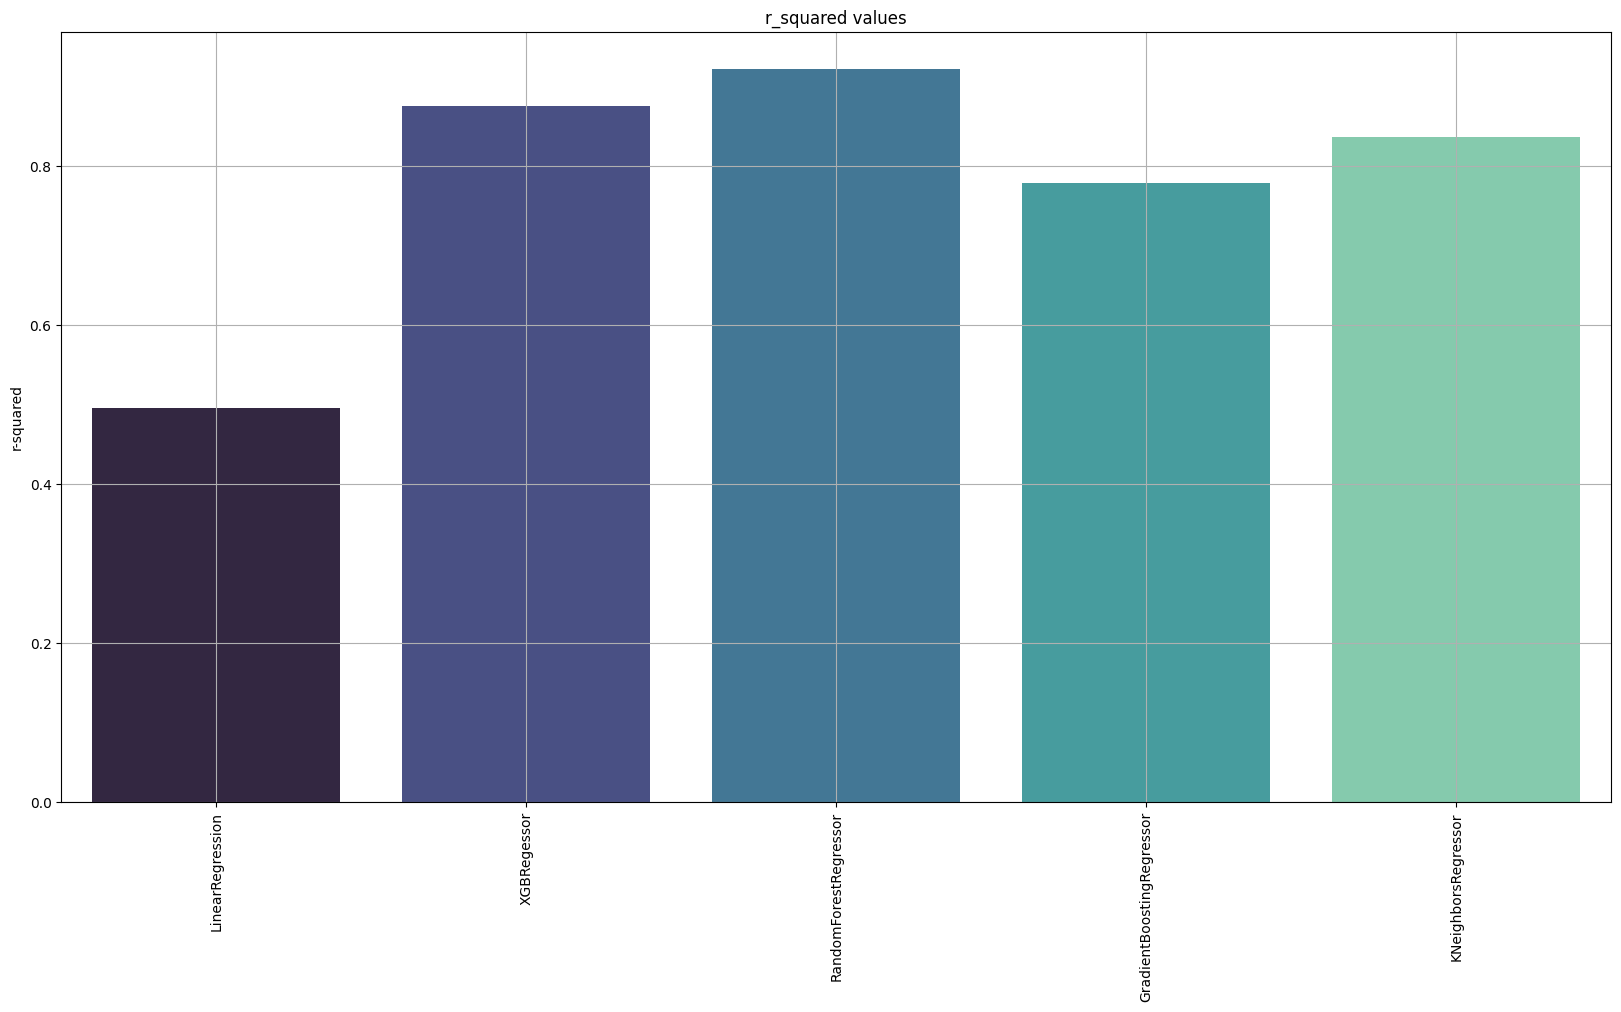

In [83]:
figure(figsize=(20,10))
sns.barplot( datascore["r-squared"],palette= "mako" )
title("r_squared values")
grid(True)
xticks(rotation=90)
show()

C:\Users\W.I\AppData\Local\Temp\ipykernel_268\1776364678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( datascore["mean square error"] , palette= "deep" )


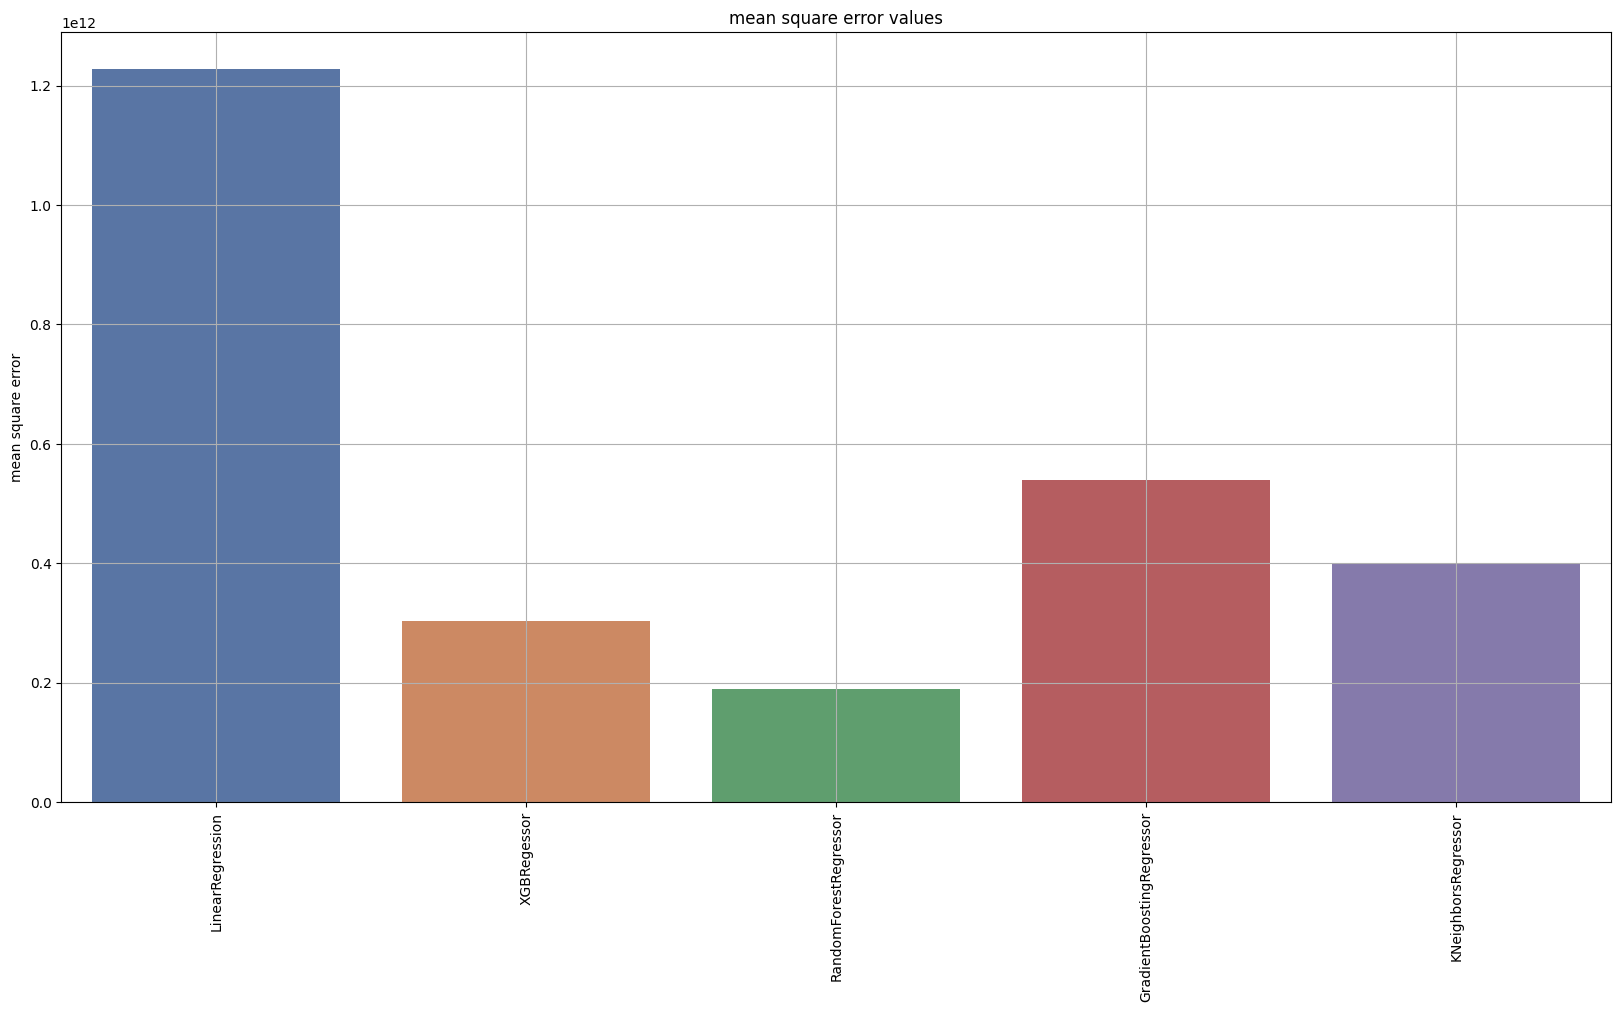

In [84]:
figure(figsize=(20,10))
sns.barplot( datascore["mean square error"] , palette= "deep" )
title("mean square error values")
grid(True)
xticks(rotation=90)
show()